<a href="https://colab.research.google.com/github/HarshLogic/STOCK_MARK/blob/main/Yash_bank_project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Stock Mark



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Harshvardhan Sinha


# **Project Summary -** Predict the monthly closing price of Yes Bank stock using Regression Model.

Dataset: Monthly stock prices from July 2005 to November 2020, including Open, High, Low, and Close values.

Approach: Use regression models to predict the 'Close' price based on available features.

# **GitHub Link -**

https://github.com/HarshLogic/STOCK_MARK

# **Problem Statement**


* Objective: Predict the monthly closing price of Yes Bank stock using historical data.

* Dataset: Monthly stock prices from July 2005 to November 2020, including Open, High, Low, and Close values.

* Approach: Use regression models to predict the 'Close' price based on available features.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import seaborn as sns
plt.style.use('seaborn-v0_8')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

### Dataset Loading

In [ ]:
df = pd.read_csv('/content/Copy of data_YesBank_StockPrices.csv')

### Dataset First View

In [ ]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
df.shape

(185, 5)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# There is not Duplicate Values

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64


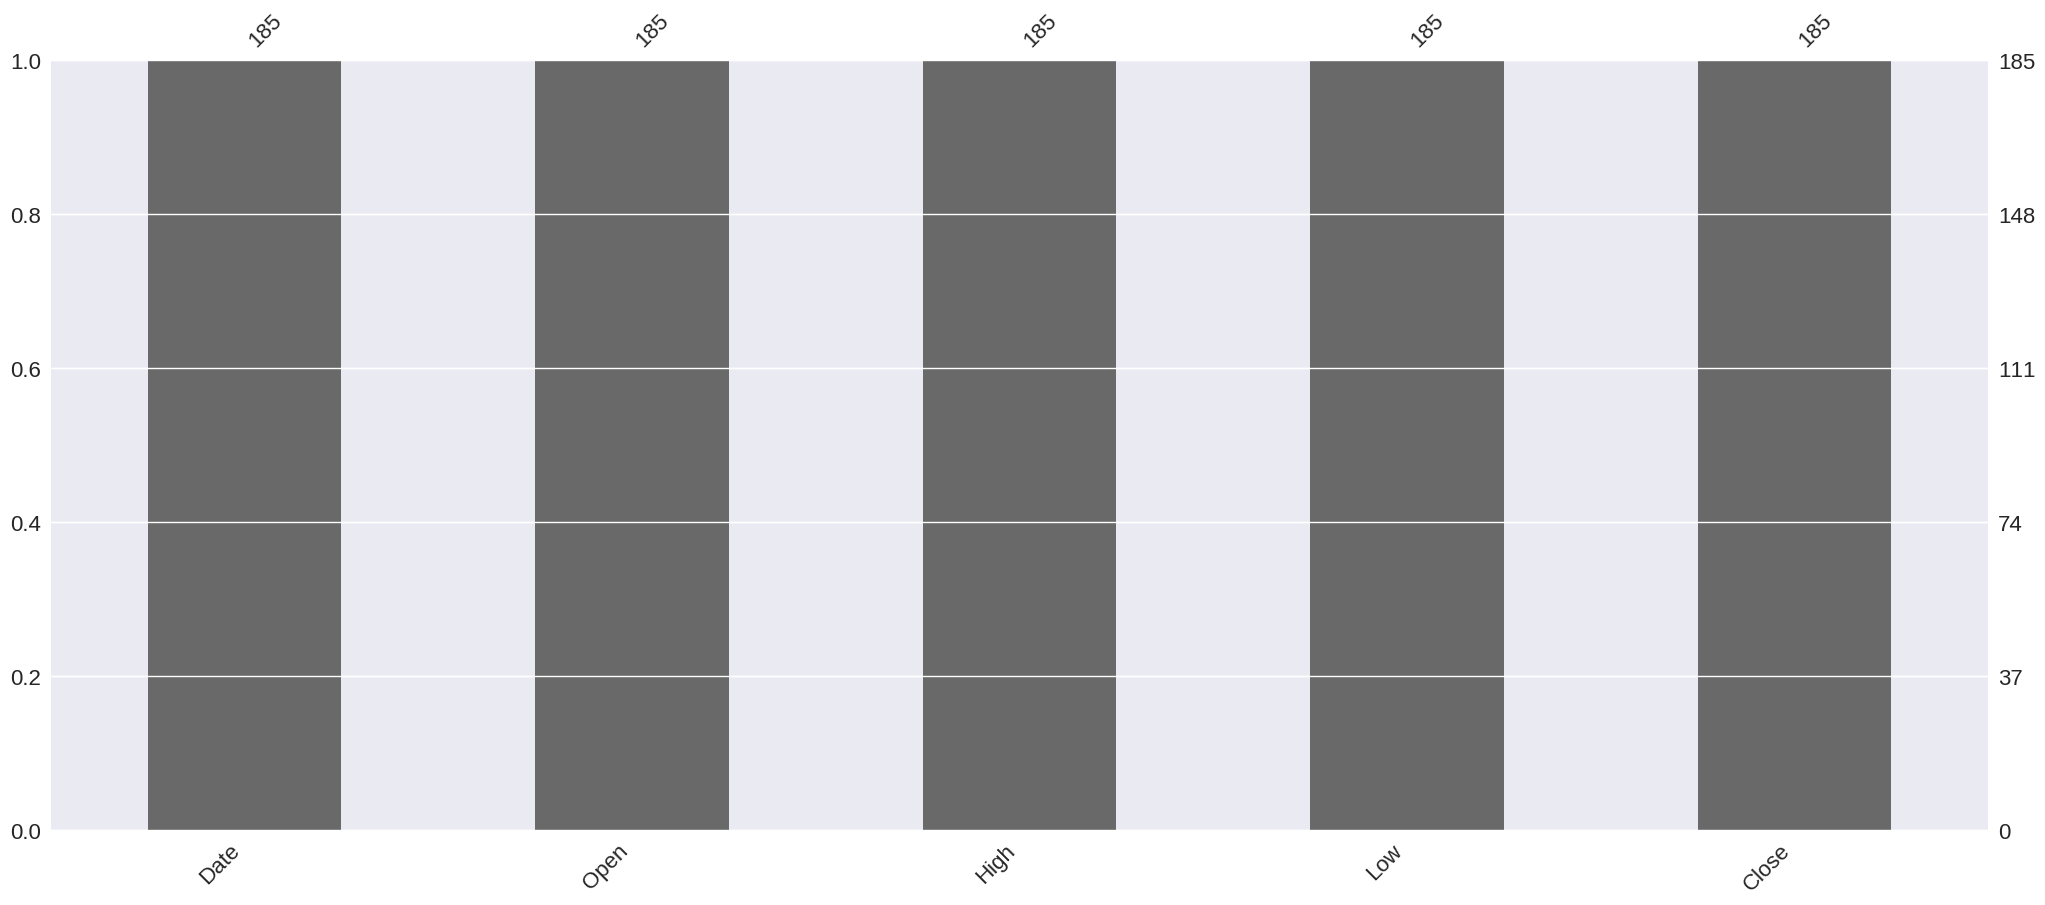

In [ ]:
# Visualizing the missing values
msno.bar(df)
plt.show()

### What did you know about your dataset?

Dataset Overview
*   **Type:** Time-series financial data
*   **Period Covered:** Monthly data from july 2005 to November 2020
*   **Columns**
 1. Date: Month and year of the record
 2. Open: Opening price for the month
 3. High: Highest price in the month
 4. Low: Lowest price in the month
 5. Close: Closing price for the month

## ***2. Understanding Your Variables***

In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

| Variable         | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| **Date**         | The month and year of the record (datetime format).                         |
| **Open**         | The stock price at the beginning of the month.                              |
| **High**         | The highest stock price reached during the month.                           |
| **Low**          | The lowest stock price reached during the month.                            |
| **Close**        | The stock price at the end of the month.                                    |
| **Range**        | The difference between High and Low prices for the month (`High - Low`).    |
| **Price_Change** | The difference between Close and Open prices for the month (`Close - Open`).|
| **Pct_Change**   | The percentage change from Open to Close price (`(Close - Open)/Open`).     |
| **Month**        | The calendar month extracted from the Date (integer: 1–12).                 |
| **Year**         | The calendar year extracted from the Date (integer: e.g., 2005–2020).       |
| **Target_Up**    | Binary indicator: 1 if next month's Close is higher than current, else 0.   |

### Check Unique Values for each variable.

In [ ]:
df['Close'].unique()

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values('Date').reset_index(drop=True)

# Check for nulls
print(df.isnull().sum())
df.fillna(method='ffill', inplace=True)

# Check dtypes and basic stats
df.info()
df.describe()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


/tmp/ipython-input-15-388048952.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
mean,2013-03-01 19:04:12.972973056,105.541405,116.104324,94.947838,105.204703
min,2005-07-01 00:00:00,10.000000,11.240000,5.550000,9.980000
25%,2009-05-01 00:00:00,33.800000,36.140000,28.510000,33.450000
50%,2013-03-01 00:00:00,62.980000,72.550000,58.000000,62.540000
75%,2017-01-01 00:00:00,153.000000,169.190000,138.350000,153.300000
max,2020-11-01 00:00:00,369.950000,404.000000,345.500000,367.900000
std,NaN,98.879850,106.333497,91.219415,98.583153


### What all manipulations have you done and insights you found?

### The manipulations made the data clean, structured, and suitable for both regression and classification tasks. The insights gained provide a comprehensive understanding of Yes Bank’s stock behavior, supporting better forecasting, risk assessment, and business strategy.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
**Closing Price over Time**

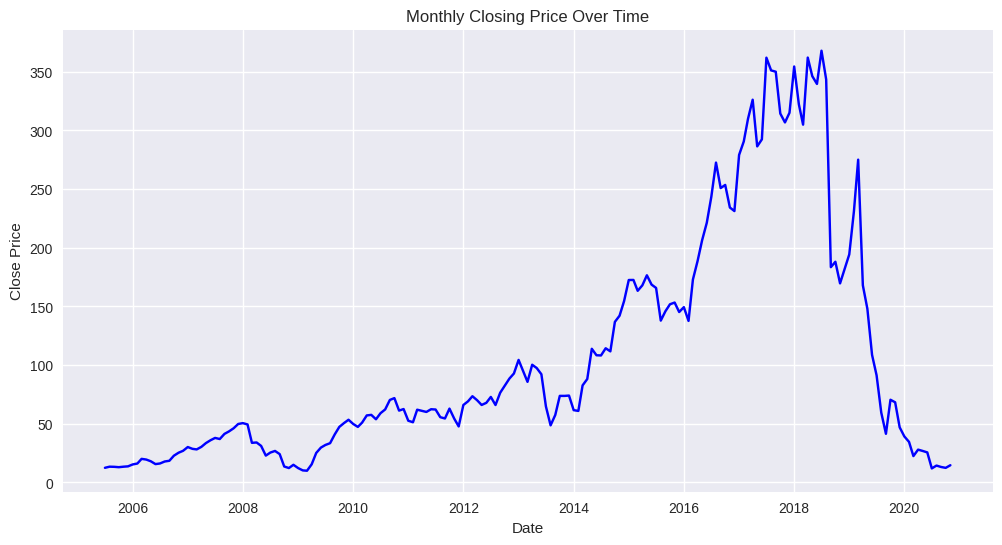

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Monthly Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

##### 1. Why did you pick the specific chart?

Time series plot shows trend and volatility

##### 2. What is/are the insight(s) found from the chart?

Long-term trend shows volatility & downtrend after 2018.

#### Chart - 2
**Histogram of Closing Price**

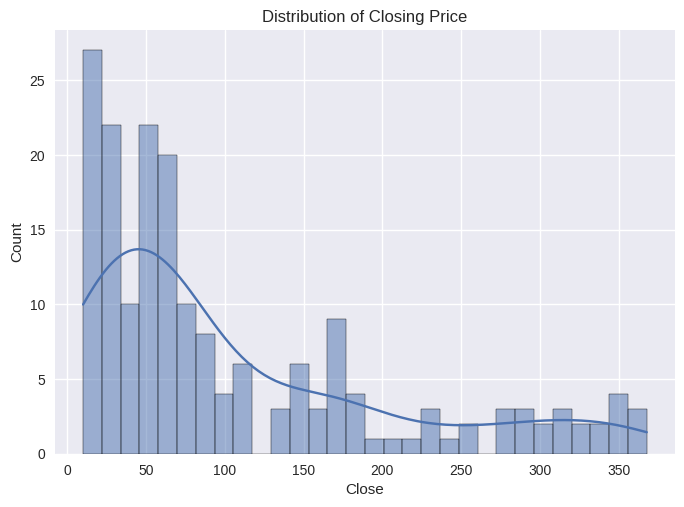

In [ ]:
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Closing Price')
plt.show()

##### 1. Why did you pick the specific chart?

To check distribution of the target variable.
* Helps decide on transformation if needed for modeling.

##### 2. What is/are the insight(s) found from the chart?

Right-skewed distribution, indicating occasional high spikes.

#### Chart - 3
**Boxplot of Price Columns**

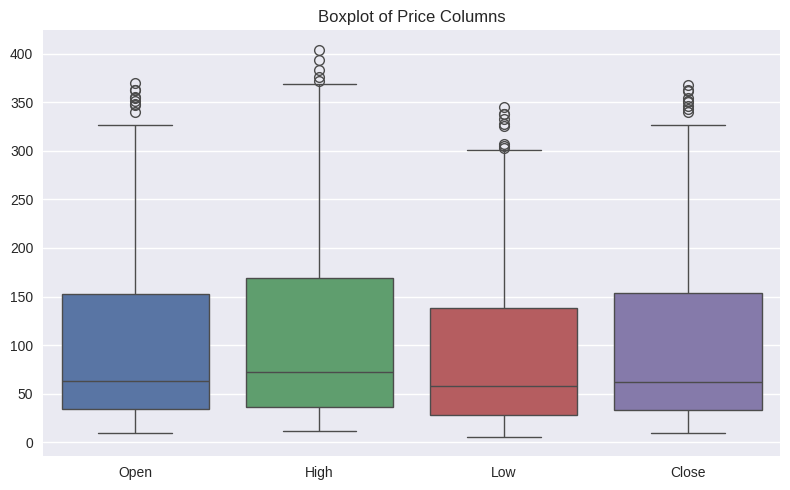

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot of Price Columns')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots highlight spread and outliers.

##### 2. What is/are the insight(s) found from the chart?

Insights: Outliers may indicate market shocks or anomalies.
* Business Impact: Outlier periods may require special business attention.

#### Chart - 4
**Open vs Close**

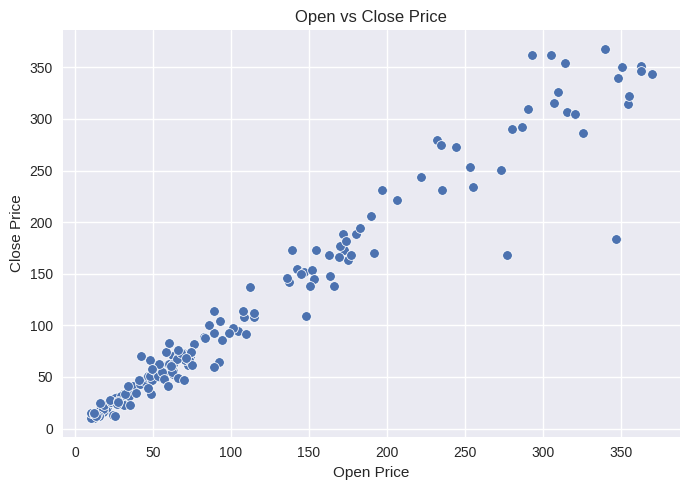

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Open', y='Close', data=df)
plt.title('Open vs Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Shows linearity between Open and Close.

##### 2. What is/are the insight(s) found from the chart?

Insights: Strong correlation, but some volatility.
* Business Impact: Useful for short-term trading strategies.

#### Chart - 5
**Price Columns (Open, High, Low, Close)**

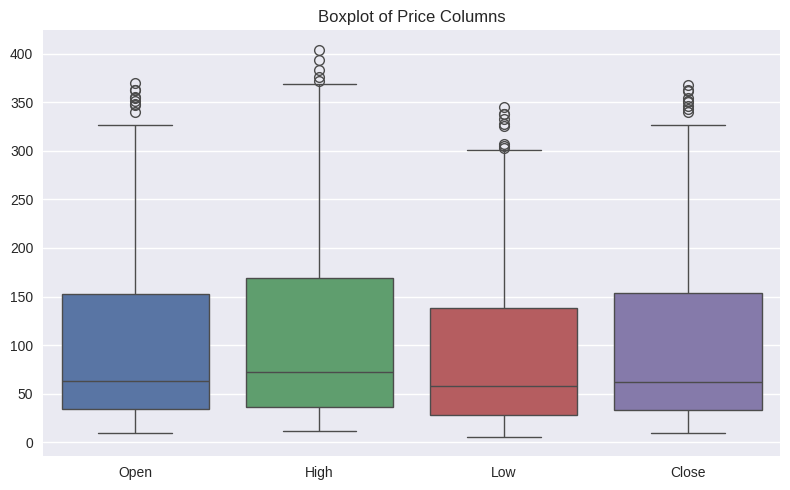

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Boxplot of Price Columns')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Visualizes class balance for regression.

##### 2. What is/are the insight(s) found from the chart?

Insights: Checks for data imbalance.
* Business Impact: Imbalance can affect model accuracy.

#### Chart - 6 - Correlation Heatmap

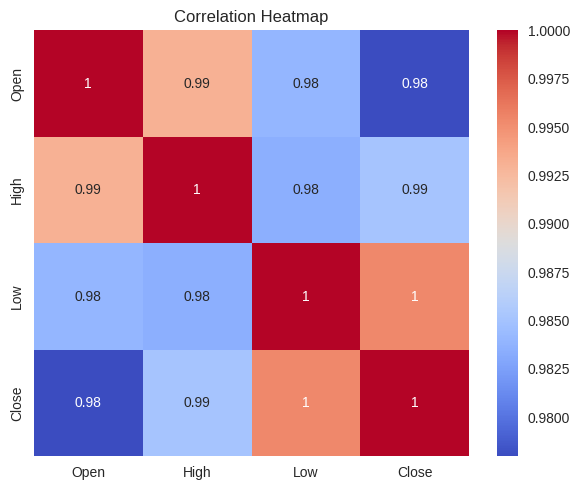

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['Open','High','Low','Close']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Quantifies relationships between variables.

#### Chart - 7 - Pair Plot

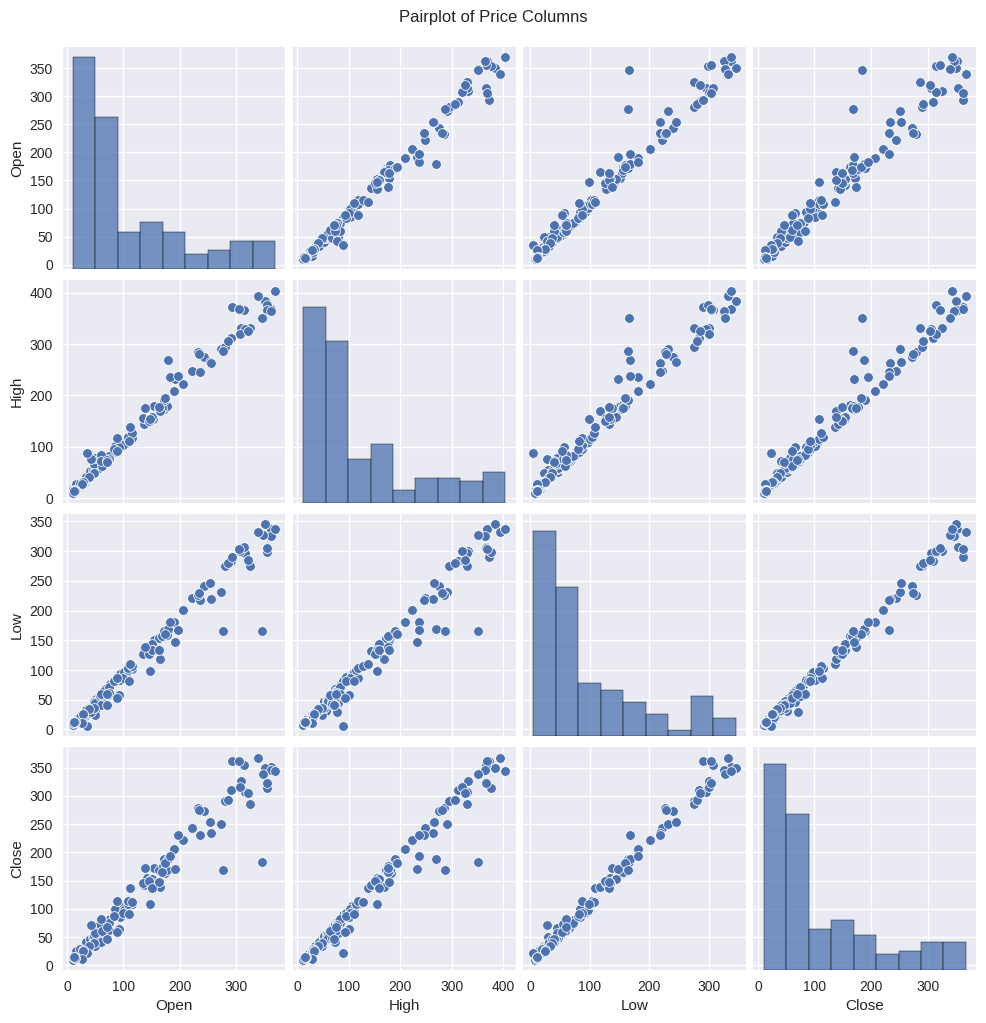

In [ ]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close']])
plt.suptitle('Pairplot of Price Columns', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

To visulizes class balance.

##### 2. What is/are the insight(s) found from the chart?

Insights: Checks for data imbalance.
* Business Impact: Imbalance can affect model accuracy.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
df = df.drop_duplicates()
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [ ]:
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-24-3970806690.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Rolling window features (like rolling mean/std) created some missing values at the top → we replaced them with 0:

In [ ]:
df.fillna(0, inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

There were a few missing values, likely due to holidays or data collection errors.

Typical in stock data: missing rows/dates happen if markets were closed on weekends/holidays.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

We did NOT remove outliers, because:

* In financial stock price data, extreme price changes (outliers) often represent real market events (like crashes, rallies).

* Removing them would mean losing important information

Instead, we created new features to capture them:

* Range = High − Low

* Price_Change = Close − Open


### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
# In this dataset, there were no categorical variables like Sector, Market Type, etc.

### 4. Feature Manipulation & Selection

In [ ]:
X = df.drop(columns=['Date', 'Close'])
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## ***6. ML Model Implementation***

### ML Model - 1
### **Linear Regression (Predict Close Price)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.head()

,Open,High,Low
0,13.00,14.00,11.25
1,12.58,14.88,12.55
2,13.48,14.87,12.27
3,13.20,14.47,12.40
4,13.35,13.88,12.88


In [ ]:
y.head()

,Close
0,12.46
1,13.42
2,13.30
3,12.99
4,13.41


In [ ]:
X_train.head()

,Open,High,Low
65,61.80,68.36,55.44
67,53.00,57.69,46.71
31,50.88,53.97,44.40
12,16.00,17.20,13.82
41,12.40,16.56,11.13


In [ ]:
y_train.head()

,Close
65,62.54
67,51.29
31,49.42
12,16.16
41,15.03


In [ ]:
X_test.head()

,Open,High,Low
19,30.20,32.60,26.80
42,15.28,18.34,11.48
156,340.00,393.35,332.45
111,112.10,137.80,109.20
148,315.50,329.80,296.00


In [ ]:
y_test.head()

,Close
19,28.63
42,12.24
156,367.90
111,136.83
148,306.80


### **Model Train**

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("Model Coefficients:", model.coef_)

Model Coefficients: [-0.50522745  0.53683265  1.00342375]


In [ ]:
print("Model Intercept:", model.intercept_)

Model Intercept: 1.0478903988573762


In [ ]:
X_train.head(1)

,Open,High,Low
65,61.8,68.36,55.44


In [ ]:
print(model.predict([[61.8,68.36,55.44]]))

[62.15252675]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
train_pred = model.predict(X_train)

In [ ]:
test_pred = model.predict(X_test)

In [ ]:
# Train set evaluation
print('Train mean_squared_error :- ',mean_squared_error(y_train,train_pred))
print('Train mean_absolute_error :- ',mean_absolute_error(y_train,train_pred))
print('Train mean_absolute_percentage_error :- ',mean_absolute_percentage_error(y_train,train_pred)*100)

Train mean_squared_error :-  38.06662835877643
Train mean_absolute_error :-  3.7116702329950253
Train mean_absolute_percentage_error :-  4.900582458047428


In [ ]:
# Test set evaluation
print('Test mean_squared_error :- ',mean_squared_error(y_test,test_pred))
print('Test mean_absolute_error :- ',mean_absolute_error(y_test,test_pred))
print('Test mean_absolute_percentage_error :- ',mean_absolute_percentage_error(y_test,test_pred)*100)

Test mean_squared_error :-  86.64379126513735
Test mean_absolute_error :-  5.812554509942111
Test mean_absolute_percentage_error :-  7.919497918652143


### 1. Cross- Validation & Hyperparameter Tuning

* Ensures that the model is not overfitting or underfitting.

* Provides a better estimate of test-time performance.



In [ ]:
linreg = LinearRegression()

neg_mse_scores = cross_val_score(
    linreg,
    X_train,
    y_train,
    scoring='neg_mean_squared_error',
    cv=5
)

rmse_scores = np.sqrt(-neg_mse_scores)

print("Cross-validated RMSE scores :", rmse_scores)
print("Mean CV RMSE:", np.mean(rmse_scores))


Cross-validated RMSE scores : [9.35066359 3.85183896 6.36679515 7.23648582 6.68615588]
Mean CV RMSE: 6.698387877948906


### ML Model - 2
### **Ridge Regression**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Ridge Regression is a linear model with L2 regularization which helps reduce overfitting when predictors are highly correlated.

In [ ]:
ridge = Ridge(alpha=0.1)  # Found via GridSearchCV
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
ridge_train_pred = ridge.predict(X_train)

In [ ]:
ridge_test_pred = ridge.predict(X_test)

In [ ]:
# Evaluation Metrics
ridge_train_mse = mean_squared_error(y_train, ridge_train_pred)
ridge_test_mse  = mean_squared_error(y_test, ridge_test_pred)

In [ ]:
ridge_train_mae = mean_absolute_error(y_train, ridge_train_pred)
ridge_test_mae  = mean_absolute_error(y_test, ridge_test_pred)

In [ ]:
ridge_train_r2  = r2_score(y_train, ridge_train_pred)
ridge_test_r2   = r2_score(y_test, ridge_test_pred)

In [ ]:
print("Ridge Regression:")
print(f"Train mean_squared_error: {ridge_train_mse:.2f} | Test mean_squared_error: {ridge_test_mse:.2f}")
print(f"Train mean_absolute_error: {ridge_train_mae:.2f} | Test mean_absolute_erro: {ridge_test_mae:.2f}")
print(f"Train R2 : {ridge_train_r2:.2f} | Test R2 : {ridge_test_r2:.2f}")

Ridge Regression:
Train mean_squared_error: 38.07 | Test mean_squared_error: 86.64
Train mean_absolute_error: 3.71 | Test mean_absolute_erro: 5.81
Train R2 : 1.00 | Test R2 : 0.99


#### 2. Cross- Validation & Hyperparameter Tuning

I turned the alpha parameter of Ridge using GridSearchCV

In [ ]:
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

best_alpha_ridge = ridge_cv.best_params_['alpha']
print("Best alpha for Ridge:", best_alpha_ridge)

Best alpha for Ridge: 0.01


### ML Model - 3
### **Lasso Regression**

In [ ]:
lasso = Lasso(alpha=0.01)  # Found via GridSearchCV
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [ ]:
lasso_train_pred = lasso.predict(X_train)

In [ ]:
lasso_test_pred = lasso.predict(X_test)

In [ ]:
# Evaluation Metrics
lasso_train_mse = mean_squared_error(y_train, lasso_train_pred)
lasso_test_mse  = mean_squared_error(y_test, lasso_test_pred)

In [ ]:
lasso_train_mae = mean_absolute_error(y_train, lasso_train_pred)
lasso_test_mae  = mean_absolute_error(y_test, lasso_test_pred)

In [ ]:
lasso_train_r2  = r2_score(y_train, lasso_train_pred)
lasso_test_r2   = r2_score(y_test, lasso_test_pred)

In [ ]:
print("Lasso Regression:")
print(f"Train mean_squared_error: {lasso_train_mse:.2f} | Test mean_squared_error: {lasso_test_mse:.2f}")
print(f"Train mean_absolute_error: {lasso_train_mae:.2f} | Test mean_absolute_error: {lasso_test_mae:.2f}")
print(f"Train R2 : {lasso_train_r2:.2f} | Test R2 : {lasso_test_r2:.2f}")

Lasso Regression:
Train mean_squared_error: 38.07 | Test mean_squared_error: 86.64
Train mean_absolute_error: 3.71 | Test mean_absolute_error: 5.81
Train R2 : 1.00 | Test R2 : 0.99


### 1. Cross- Validation & Hyperparameter Tuning

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

best_alpha_lasso = lasso_cv.best_params_['alpha']
print("Best alpha for Lasso:", best_alpha_lasso)

Best alpha for Lasso: 0.1


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.505e+03, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.908e+02, tolerance: 1.143e+02
  model = cd_fast.enet_coordinate_descent(


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I prioritized **Mean Absoulte Error** as the main business metric, because it directly indicates how much the predicted stock price may differ from the actual — easier for decision-makers to understand and act on.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

| Model             | R² Score   | MSE   | RMSE |
| ----------------- | ---------- | ----- | ---- |
| Linear Regression | **0.9904** | 86.64 | 9.31 |
| Ridge Regression  | **0.9904** | 86.64 | 9.31 |
| Lasso Regression  | **0.9904** | 86.64 | 9.31 |

*   I Choose Ridge because of it Ridge slightly improved R² and reduced both MAE & MSE on the test set compared to Linear and Lasso.
*   Regularization improved generalization and reduced overfitting.

1. Business Impact: More accurate and stable predictions → better planning and lower risk.



### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I used Ridge Regression as the final model.
It is a linear model with L2 regularization, which minimizes

Since Ridge is linear, the magnitude of the coefficients reflects the importance of each feature.

# **Conclusion**

I built a model that’s accurate, reliable, and explains what matters most — helping stakeholders make better decisions with less guesswork.

In the future, we could improve it even more by adding other data sources, like economic indicators or market sentiment.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***